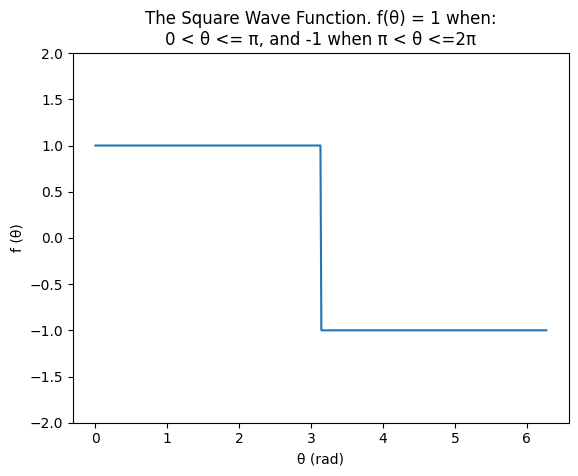

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.signal as signal

#input a function, bounds a and b, and an integer n that determines how many steps will occur
def Simpsons(function, a, b, n):
    
    h = (b-a) / n #calculates the "length" of each step
    first_term = function(a) #calculates the first term
    last_term = function(b) #calculates the final term
    total = 0 #initializes 0
    
    j = 1
    while(j<n): #while the counter is less then the predetermined amount of steps that will occur, do this loop
        even = 0 #initialzes even and odd variables
        odd = 0
        x = a + (j*h) #calculates x
        if (j%2) == 0: #if j is even, x2, if odd, x4
            total = total + (function(x) * 2)
        else:
            total = total + (function(x) * 4)
        j = j + 1 #iterates counter
        
    total = (h/3)*(total+first_term+last_term) #calculates the final answer via simpsons rule formula
    return total

#initializing variables
n = 100
omega = 1
T = 2 * math.pi

#creates Square Wave graph
plt.figure() 
t = np.linspace(0, T, 500, endpoint=False) #creates array with 500 points between 0 and 2pi
plt.plot(t, signal.square(t,duty=0.5))
plt.ylim(-2,2) #sets y-axis
plt.title('The Square Wave Function. f(θ) = 1 when:\n0 < θ <= π, and -1 when π < θ <=2π')
plt.xlabel('θ (rad)')
plt.ylabel('f (θ)')
plt.show()

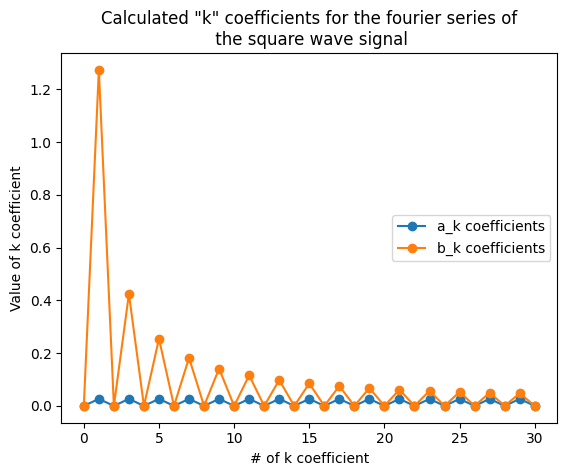

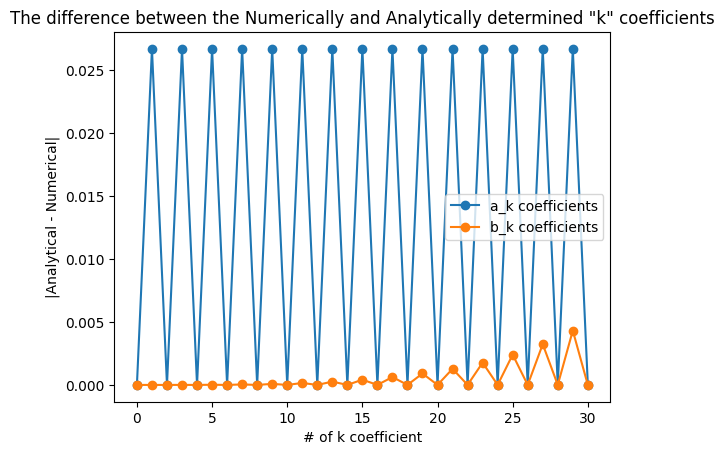

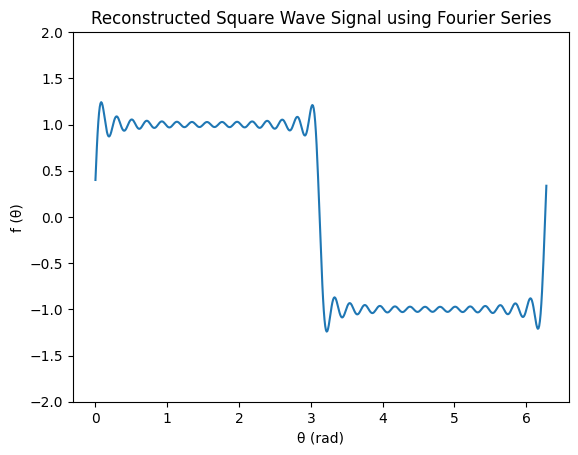

In [2]:
#f(t) = square wave

def function(t): #defines function we're finding fourier series of
    return signal.square(t,duty=0.5)

def f_ak(t): #square * cos(kωt)
    return ( function(t) * math.cos(k*omega*t) )

def f_bk(t): #square * sin(kωt)
    return ( function(t) * math.sin(k*omega*t) )

#initializing variables and lists, finding first element of a.
n = 100
omega = 1
T = 2 * math.pi
k = 1
a_0 = (1/T)*(Simpsons(function,0,T,n))
a_list = [a_0]
b_list = [0.0]
k_list = [0]
anal_a = [0.0]
anal_b = [0.0]
reconstructed_list = []
time_list = []
t = 0

#this loop finds elements 1-10/20/30 of the a and b lists.
#while (k<11): #used to find 10 fourier coefficients
#while (k<21): #used to find 20 fourier coefficients
while (k<31): #used to find 30 fourier coefficients
    
    a_k = (2/T)*(Simpsons(f_ak,0,T,n)) #this calculates the numerical a_k
    b_k = (2/T)*(Simpsons(f_bk,0,T,n)) #this calculates the numerical b_k
    
    if (k%2) == 1: #if k is odd, then a_k = 0 and b_k = that formula
        anala_k = 0
        analb_k = (4/(math.pi*k)) #this calculates the analytical b_k
    else: #else, a_k = a_k and b_k = 0.
        anala_k = a_k
        analb_k = 0
        
    anala_k = abs(a_k - anala_k) #abs of the difference between analytical and numerical
    analb_k = abs(b_k - analb_k) #^^^
    
    a_list.append(a_k)
    b_list.append(b_k)
    k_list.append(k)
    anal_a.append(anala_k)
    anal_b.append(analb_k)
    k = k + 1

#this graphs all of the coefficients
plt.figure() 
plt.plot(k_list, a_list, '-o')
plt.plot(k_list, b_list, '-o')
plt.title('Calculated "k" coefficients for the fourier series of\n the square wave signal')
plt.legend(['a_k coefficients','b_k coefficients'], loc = 'center right')
plt.xlabel('# of k coefficient')
plt.ylabel('Value of k coefficient')
plt.show()

#this plots the difference between the two lists
plt.figure() 
plt.plot(k_list, anal_a, '-o')
plt.plot(k_list, anal_b, '-o')
plt.title('The difference between the Numerically and Analytically determined "k" coefficients')
plt.legend(['a_k coefficients','b_k coefficients'], loc = 'center right')
plt.xlabel('# of k coefficient')
plt.ylabel('|Analytical - Numerical|')
plt.show()

while(t<=T): #this loop converts the calculated coefficients and reconstructs the wave
    sum = a_0
    number = 1
    while (number<len(a_list)): #this loop is doing the summation in Eq (1) from the lab manual, and does it until the list runs out of elements
        sum = sum + a_list[number] * math.cos(number * omega * t) + b_list[number] * math.sin(number * omega * t)
        number = number + 1
    reconstructed_list.append(sum)
    time_list.append(t)
    t = t + 0.01

#this graphs the reconstructed wave
plt.figure() 
plt.plot(time_list, reconstructed_list)
plt.ylim(-2,2)
plt.title('Reconstructed Square Wave Signal using Fourier Series')
plt.xlabel('θ (rad)')
plt.ylabel('f (θ)')
plt.show()

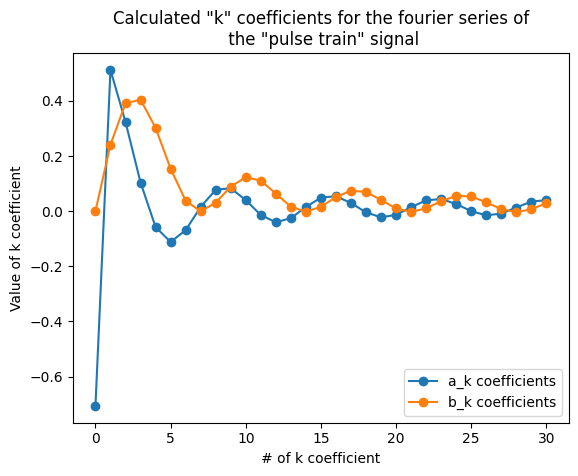

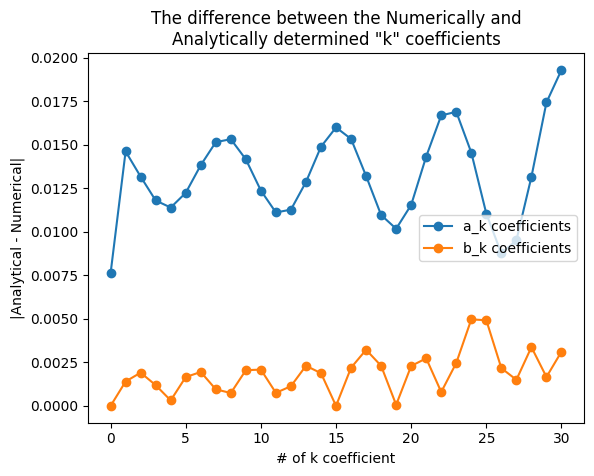

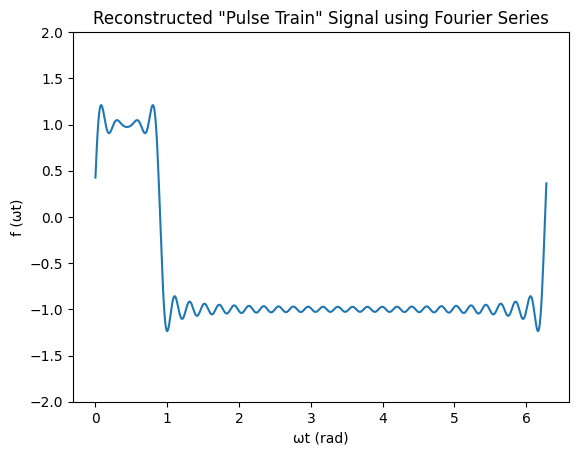

In [3]:
#f(t) = pulse train
alpha = 7

def function(t): #defines function we're finding fourier series of
    return signal.square(t,duty=1/alpha)

def f_ak(t): #square * cos(kωt)
    return ( function(t) * math.cos(k*omega*t) )

def f_bk(t): #square * sin(kωt)
    return ( function(t) * math.sin(k*omega*t) )

#initializing variables and lists, finding first element of a.
n = 100
omega = 1
T = 2 * math.pi
k = 1
a_0 = (1/T)*(Simpsons(function,0,T,n))
anala_0 = (2/alpha)-1
a_list = [a_0]
b_list = [0.0]
k_list = [0]
anal_a = [abs(anala_0-a_0)]
anal_b = [0.0]
reconstructed_list = []
time_list = []
t = 0

#while (k<11): #used to find 10 fourier coefficients
#while (k<21): #used to find 20 fourier coefficients
while (k<31): #used to find 30 fourier coefficients
    a_k = (2/T)*(Simpsons(f_ak,0,T,n)) #this calculates the numerical a_k coefficient
    b_k = (2/T)*(Simpsons(f_bk,0,T,n)) #this calculates the numerical a_k coefficient
    
    anala_k = (2/(k* math.pi))*math.sin(2*k*math.pi/alpha) #this calculates the analytical a_k coefficient
    analb_k = (2/(k* math.pi))*(1-math.cos(2*k*math.pi/alpha)) #this calculates the analytical b_k coefficient
        
    anala_k = abs(a_k - anala_k) #abs of the difference between analytical and numerical
    analb_k = abs(b_k - analb_k) #^^^
    
    a_list.append(a_k)
    b_list.append(b_k)
    k_list.append(k)
    anal_a.append(anala_k)
    anal_b.append(analb_k)
    k = k + 1

#this graphs coefficients
plt.figure() 
plt.plot(k_list, a_list, '-o')
plt.plot(k_list, b_list, '-o')
plt.title('Calculated "k" coefficients for the fourier series of\n the "pulse train" signal')
plt.legend(['a_k coefficients','b_k coefficients'], loc = 'lower right')
plt.xlabel('# of k coefficient')
plt.ylabel('Value of k coefficient')
plt.show()

#this plots the difference between the two lists
plt.figure() 
plt.plot(k_list, anal_a, '-o')
plt.plot(k_list, anal_b, '-o')
plt.title('The difference between the Numerically and\nAnalytically determined "k" coefficients')
plt.legend(['a_k coefficients','b_k coefficients'], loc = 'center right')
plt.xlabel('# of k coefficient')
plt.ylabel('|Analytical - Numerical|')
plt.show()

#this loop converts the calculated coefficients and reconstructs the wave
while(t<=T):
    sum = a_0
    number = 1
    while (number<len(a_list)): #this loop is doing the summation in Eq (1) from the lab manual, and does it until the list runs out of elements
        sum = sum + a_list[number] * math.cos(number * omega * t) + b_list[number] * math.sin(number * omega * t)
        number = number + 1
    reconstructed_list.append(sum)
    time_list.append(t)
    t = t + 0.01

#this graphs the reconstructed wave
plt.figure() 
plt.plot(time_list, reconstructed_list)
plt.ylim(-2,2)
plt.title('Reconstructed "Pulse Train" Signal using Fourier Series')
plt.xlabel('ωt (rad)')
plt.ylabel('f (ωt)')
plt.show()